# NLP Project Steps

In [2]:
import pandas as pd
from textblob.en import positive

## 1. Data Collection

We have already collected the data from Kaggle and stored it in DataSets folder

In [3]:
df = pd.read_csv('../DataSets/IMDB Dataset 50k review.csv')

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.info()
# no missing values are present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df.duplicated().sum()
# so we have 418 duplicate rows

np.int64(418)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
# df = df.iloc[:1000]     # taking only 1000 rows for faster processing .

## 2. Data Cleaning

* We will perform the following steps to clean the data:
    - Lower Case
    - Remove trailing and leading spaces
    - Remove HTML tags
    - Remove URLs
    - Expanding Abbreviations
    - Spelling Correction
    - Remove Punctuation

In [10]:
# Lower Case
df['review'] = df['review'].str.lower()
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [11]:
# Remove trailing and leading spaces
df['review'] = df['review'].str.strip()

In [12]:
# Remove HTML tags

# method 1
# import re                               # regular expression library
# def remove_html_tags(data):
#     data = re.sub(r'<.*?>','', data)    #
#     return data

# remove_html_tags('<p>This is a <b>bold</b> paragraph.</p>')

# df['review'] = df['review'].apply(remove_html_tags)
# df.head()

# method 2 ( Better method )
df['review'] = df['review'].str.replace(r'<.*?>', '', regex=True)   # here regex=True is important since we are using regex pattern without it it will give warning .
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [13]:
# finding reviews with one or more url in it
df[df['review'].str.contains(r"https?://\S+|www\.\S+")].iloc[1].values

array(["following directly from where the story left off in part one, the second half which sets about telling the inevitable downfall and much more grim side of the man's legacy is exactly as such. in direct contrast to the first feature, part two represents a shift from che the pride and glory of a revolutionised country, to che\x97struggling liberator of a country to which he has no previous ties. the change of setting isn't just aesthetic; from the autumn and spring greys of the woodlands comes a change of tone and heart to the feature, replacing the optimism of the predecessor with a cynical, battered and bruised reality aligned to an all new struggle. yet, as che would go on to say himself\x97such a struggle is best told exactly as that\x97a struggle. while part one certainly helped document that initial surge to power that the revolutionary guerrilla acquired through just that, part two takes a much more refined, callous and bleak segment of che's life and ambition, and gives it

In [14]:
# Remove URLs
# http://google.in      www.google.com      www.india.gov.in
# so we have multiple types of urls

# Method 1
import re

def remove_url(data):
    data = re.sub(r"https?://\S+|www\.\S+", "", data)
    return data

# remove_url("Check out this link: https://example.com and also visit www.example.org for more info and http://test.com")

# df['review'] = df['review'].apply(remove_url)

# Method 2 ( Better method )
df['review'] = df['review'].str.replace(r"https?://\S+|www\.\S+", "", regex=True)
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [15]:
# expanding abbreviations
# he's  -> he is and so on
# we will use regex for this task
# we will create a function to do this task and then apply it to the dataframe

import re

def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That’s", "That is", data)
    data = re.sub(r"won’t", "will not", data)
    data = re.sub(r"they’re", "they are", data)
    data = re.sub(r"Can’t", "Cannot", data)
    data = re.sub(r"wasn’t", "was not", data)
    data = re.sub(r"don\x89Ûat", "do not", data)
    data = re.sub(r"aren’t", "are not", data)
    data = re.sub(r"isn’t", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven’t", "have not", data)
    data = re.sub(r"hasn’t", "has not", data)
    data = re.sub(r"There’s", "There is", data)
    data = re.sub(r"He’s", "He is", data)
    data = re.sub(r"It’s", "It is", data)
    data = re.sub(r"You’re", "You are", data)
    data = re.sub(r"I’M", "I am", data)
    data = re.sub(r"shouldn’t", "should not", data)
    data = re.sub(r"wouldn’t", "would not", data)
    data = re.sub(r"i’m", "I am", data)
    data = re.sub(r"I\x89ÛÏm", "I am", data)
    data = re.sub(r"I\x89Û÷m", "I am", data)
    data = re.sub(r"Isn’t", "is not", data)
    data = re.sub(r"Here’s", "Here is", data)
    data = re.sub(r"You’ve", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"We’re", "we are", data)
    data = re.sub(r"what’s", "what is", data)
    data = re.sub(r"couldn’t", "could not", data)
    data = re.sub(r"we’ve", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who’s", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y’all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would\x89Ûªve", "would have", data)
    data = re.sub(r"it’ll", "it will", data)
    data = re.sub(r"we’ll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We\x89Ûªve", "We have", data)
    data = re.sub(r"he’ll", "he will", data)
    data = re.sub(r"Y’all", "You all", data)
    data = re.sub(r"Weren’t", "Were not", data)
    data = re.sub(r"Didn’t", "Did not", data)
    data = re.sub(r"they’ll", "they will", data)
    data = re.sub(r"they’d", "they would", data)
    data = re.sub(r"DON’T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they’ve", "they have", data)
    data = re.sub(r"i’d", "I would", data)
    data = re.sub(r"should\x89Ûªve", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where’s", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"We’d", "We would", data)
    data = re.sub(r"i’ll", "I will", data)
    data = re.sub(r"weren’t", "were not", data)
    data = re.sub(r"They’re", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let’s", "let us", data)
    data = re.sub(r"it’s", "it is", data)
    data = re.sub(r"can’t", "cannot", data)
    data = re.sub(r"don’t", "do not", data)
    data = re.sub(r"you’re", "you are", data)
    data = re.sub(r"i’ve", "I have", data)
    data = re.sub(r"that’s", "that is", data)
    data = re.sub(r"i’ll", "I will", data)
    data = re.sub(r"doesn’t", "does not", data)
    data = re.sub(r"i’d", "I would", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"donâ't", "do not", data)

    return data

In [16]:
remove_abb("He's going to the park. There's a dog. I'm happy. Don't worry!")

"He's going to the park. There's a dog. I'm happy. do not worry!"

In [17]:
df['review'] = df['review'].apply(remove_abb)
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [18]:
# Spelling Correction
# we will use textblob library for this task
# !pip install textblob
from textblob import TextBlob

# text = "hi i can drve at nigt with no ligts"
# TextBlob(text).correct().string

def correct_spell(data):
    return TextBlob(data).correct().string

In [19]:
# df['review'] = df['review'].apply(correct_spell)    # this will take some time to execute

In [20]:
# Remove Punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
def remove_punctuation(data):
    for char in string.punctuation:
        if char in data:
            data = data.replace(char, '')
    return data

In [22]:
# remove_punctuation("Hello, world! is this a test?")

In [23]:
df['review'] = df['review'].apply(remove_punctuation)
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,petter matteis love in the time of money is a ...,positive


## 3. Text Preprocessing

- we will perform the following steps to preprocess the text:
    - Tokenization : it is the process of breaking down a text into smaller units called tokens . tokens can be words , phrases , or sentences .
    - Stop Words Removal : these are the most common words in a language that do not add much meaning to a sentence for example : is, am, are, the, a, an, in, on, at, for, to, and, but, or etc .
    - Stemming : it reduces words to their root form , but the root form may not be a valid word .
    - Lemmatization : it reduces words to their base form , and the base form is a valid word .

In [24]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RITESH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\RITESH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [25]:
from nltk.tokenize import word_tokenize
df['Tokenized_review'] = df['review'].apply(word_tokenize)
df.head()

,review,sentiment,Tokenized_review
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione..."
1,a wonderful little production the filming tech...,positive,"[a, wonderful, little, production, the, filmin..."
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,..."
3,basically there is a family where a little boy...,negative,"[basically, there, is, a, family, where, a, li..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, in, the, time, of, mon..."


In [26]:
# Stop Words Removal
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RITESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
len(stopwords.words('english'))

198

In [28]:
def remove_stopwords(text):
    L =[]
    for word in text:
        if word not in stop_words:
            L.append(word)
    return L

# The actual time complexity is O(n * m * k), where: n = number of reviews , m = average number of words per review , k = number of stop words (about 179)
# But if you convert stop_words to a set, checking membership becomes O(1), so the complexity is O(n * m).

# stop_words_set = set(stop_words)

# def remove_stopwords(text):
#     return [word for word in text if word not in stop_words_set]


In [29]:
# remove_stopwords(['i', 'thought', 'this', 'was', 'a' , 'wonderful', 'way'])

In [30]:
df['Tokenized_review'] = df['Tokenized_review'].apply(remove_stopwords)      # removing stop words from the tokenized review .
df.head()

,review,sentiment,Tokenized_review
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,a wonderful little production the filming tech...,positive,"[wonderful, little, production, filming, techn..."
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically there is a family where a little boy...,negative,"[basically, family, little, boy, jake, thinks,..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, time, money, visually,..."


## 4.  EDA ( Exploratory Data Analysis ) and Feature Engineering

- we will perform the following steps to analyze the data:
    - distribution of text length / word count
    - common unigrams/bigrams/trigrams
    - wordcloud

In [31]:
# Distribution of text length / word count
# we will create two new columns in the dataframe one for character length and other for word length to analyze the distribution of text length / word count .

In [32]:
df['review'] = df['Tokenized_review'].apply(lambda x : " ".join(x))
df.head()

,review,sentiment,Tokenized_review
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn..."
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,..."
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,..."


In [33]:
df['char_len'] = df['review'].str.len()

In [34]:
df

,review,sentiment,Tokenized_review,char_len
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",1146
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",656
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",592
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,...",440
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...",863
...,...,...,...,...
49995,thought movie right good job wasnt creative or...,positive,"[thought, movie, right, good, job, wasnt, crea...",533
49996,bad plot bad dialogue bad acting idiotic direc...,negative,"[bad, plot, bad, dialogue, bad, acting, idioti...",394
49997,catholic taught parochial elementary schools n...,negative,"[catholic, taught, parochial, elementary, scho...",819
49998,im going disagree previous comment side maltin...,negative,"[im, going, disagree, previous, comment, side,...",837


In [35]:
df['word_len'] = df['Tokenized_review'].apply(len)

In [36]:
df

,review,sentiment,Tokenized_review,char_len,word_len
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",1146,166
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",656,84
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",592,87
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,...",440,64
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...",863,125
...,...,...,...,...,...
49995,thought movie right good job wasnt creative or...,positive,"[thought, movie, right, good, job, wasnt, crea...",533,82
49996,bad plot bad dialogue bad acting idiotic direc...,negative,"[bad, plot, bad, dialogue, bad, acting, idioti...",394,55
49997,catholic taught parochial elementary schools n...,negative,"[catholic, taught, parochial, elementary, scho...",819,114
49998,im going disagree previous comment side maltin...,negative,"[im, going, disagree, previous, comment, side,...",837,115


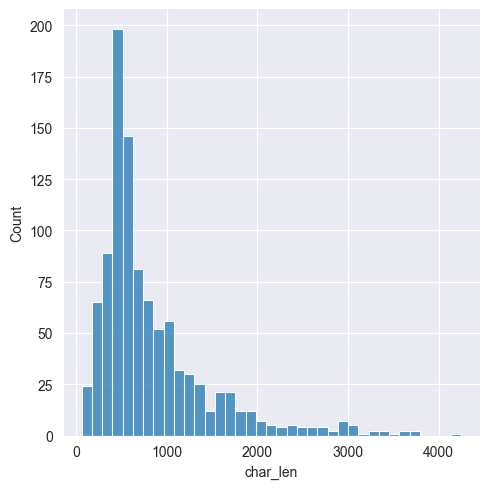

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(df['char_len'])

In [38]:
df[ df['sentiment'] == 'positive' ]

,review,sentiment,Tokenized_review,char_len,word_len
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",1146,166
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",656,84
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",592,87
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...",863,125
5,probably alltime favorite movie story selfless...,positive,"[probably, alltime, favorite, movie, story, se...",400,58
...,...,...,...,...,...
49983,loved fan original series always wondered back...,positive,"[loved, fan, original, series, always, wondere...",427,64
49985,imaginary heroes clearly best film year comple...,positive,"[imaginary, heroes, clearly, best, film, year,...",699,101
49989,got one weeks ago love modern light filled tru...,positive,"[got, one, weeks, ago, love, modern, light, fi...",606,89
49992,john garfield plays marine blinded grenade fig...,positive,"[john, garfield, plays, marine, blinded, grena...",643,89


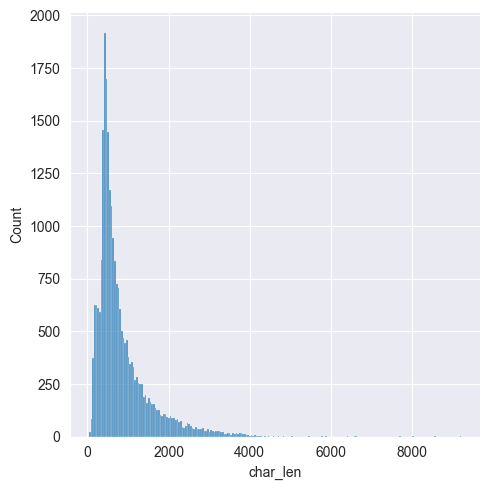

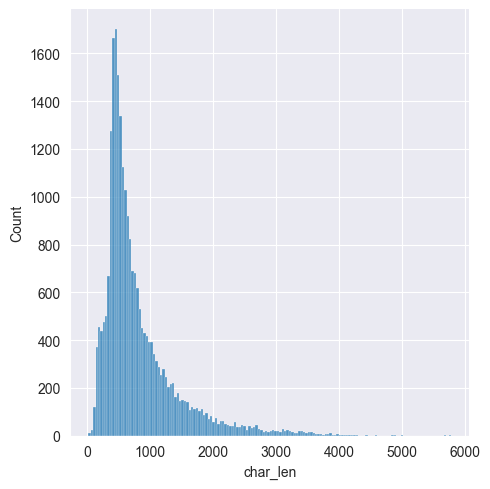

In [39]:
sns.displot(df[ df['sentiment'] == 'positive' ]['char_len'])
sns.displot(df[ df['sentiment'] == 'negative' ]['char_len'])

<Axes: xlabel='char_len', ylabel='Count'>

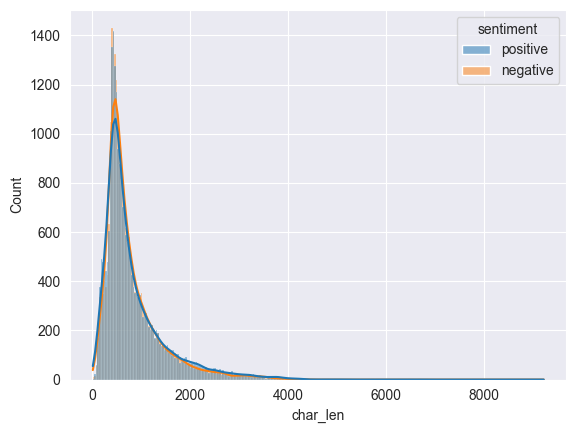

In [40]:
# sns.displot creates a new figure for each call, so each sentiment is plotted separately.
# To show both distributions on a single plot, use sns.histplot and plot both series together, specifying the hue parameter.
import seaborn as sns

sns.histplot(data=df, x='char_len', hue='sentiment', kde=True)

if we compare both the plots and see the difference then we can say that the positive reviews are generally longer than the negative reviews  but here we are not able to see the difference clearly . so , it is not a good feature to classify the reviews .

<Axes: xlabel='word_len', ylabel='Count'>

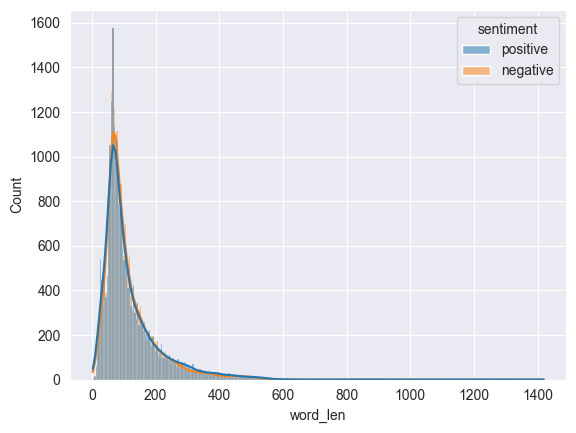

In [41]:
sns.histplot(data=df, x='word_len', hue='sentiment', kde=True)

this too is not a good feature to classify the reviews .

In [42]:
# Common unigrams/bigrams/trigrams and so on .
    # unigrams : single words in the text
    # bigrams : two consecutive words in the text
    # trigrams : three consecutive words in the text

In [43]:
df

,review,sentiment,Tokenized_review,char_len,word_len
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",1146,166
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",656,84
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",592,87
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,...",440,64
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...",863,125
...,...,...,...,...,...
49995,thought movie right good job wasnt creative or...,positive,"[thought, movie, right, good, job, wasnt, crea...",533,82
49996,bad plot bad dialogue bad acting idiotic direc...,negative,"[bad, plot, bad, dialogue, bad, acting, idioti...",394,55
49997,catholic taught parochial elementary schools n...,negative,"[catholic, taught, parochial, elementary, scho...",819,114
49998,im going disagree previous comment side maltin...,negative,"[im, going, disagree, previous, comment, side,...",837,115


This will take too much time to execute since we have 50k reviews in the dataset . So , we will take only 1000 reviews for faster processing .

In [44]:
temp = df.copy()
df = df.iloc[:1000]
# this will prevent us from running the whole notebook again and again . we have stored the original dataframe in temp variable and it can be used whenever needed .

In [45]:
from nltk import ngrams
# df['Tokenized_review'].sum()    # this will give a list of all the words in the reviews .
pd.Series(ngrams(df['Tokenized_review'].sum(), 3)).value_counts().head(10)

(I, ever, seen)            21
(worst, movie, ever)       13
(You, would, think)         9
(I, would, like)            8
(movie, ever, seen)         8
(movie, I, ever)            7
(would, like, see)          7
(world, war, ii)            6
(complete, waste, time)     6
(12, year, old)             6
Name: count, dtype: int64

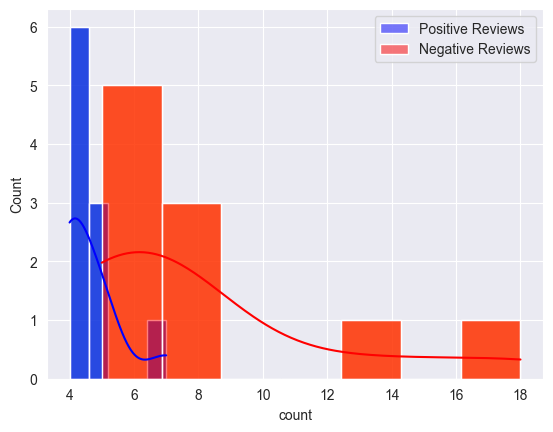

In [48]:
# analyzing positive reviews in trigrams
positive_3grams = pd.Series(ngrams(df[df['sentiment'] == 'positive']['Tokenized_review'].sum(), 3)).value_counts().head(10)
# analyzing negative reviews in trigrams
negative_3grams = pd.Series(ngrams(df[df['sentiment'] == 'negative']['Tokenized_review'].sum(), 3)).value_counts().head(10)
# now we can see the difference between the positive and negative reviews .
sns.histplot(positive_3grams)
sns.histplot(negative_3grams)
# showing both the plots in a single plot
sns.histplot(data=positive_3grams, color='blue', label='Positive Reviews', kde=True)
sns.histplot(data=negative_3grams, color='red', label='Negative Reviews', kde=True)
plt.legend()

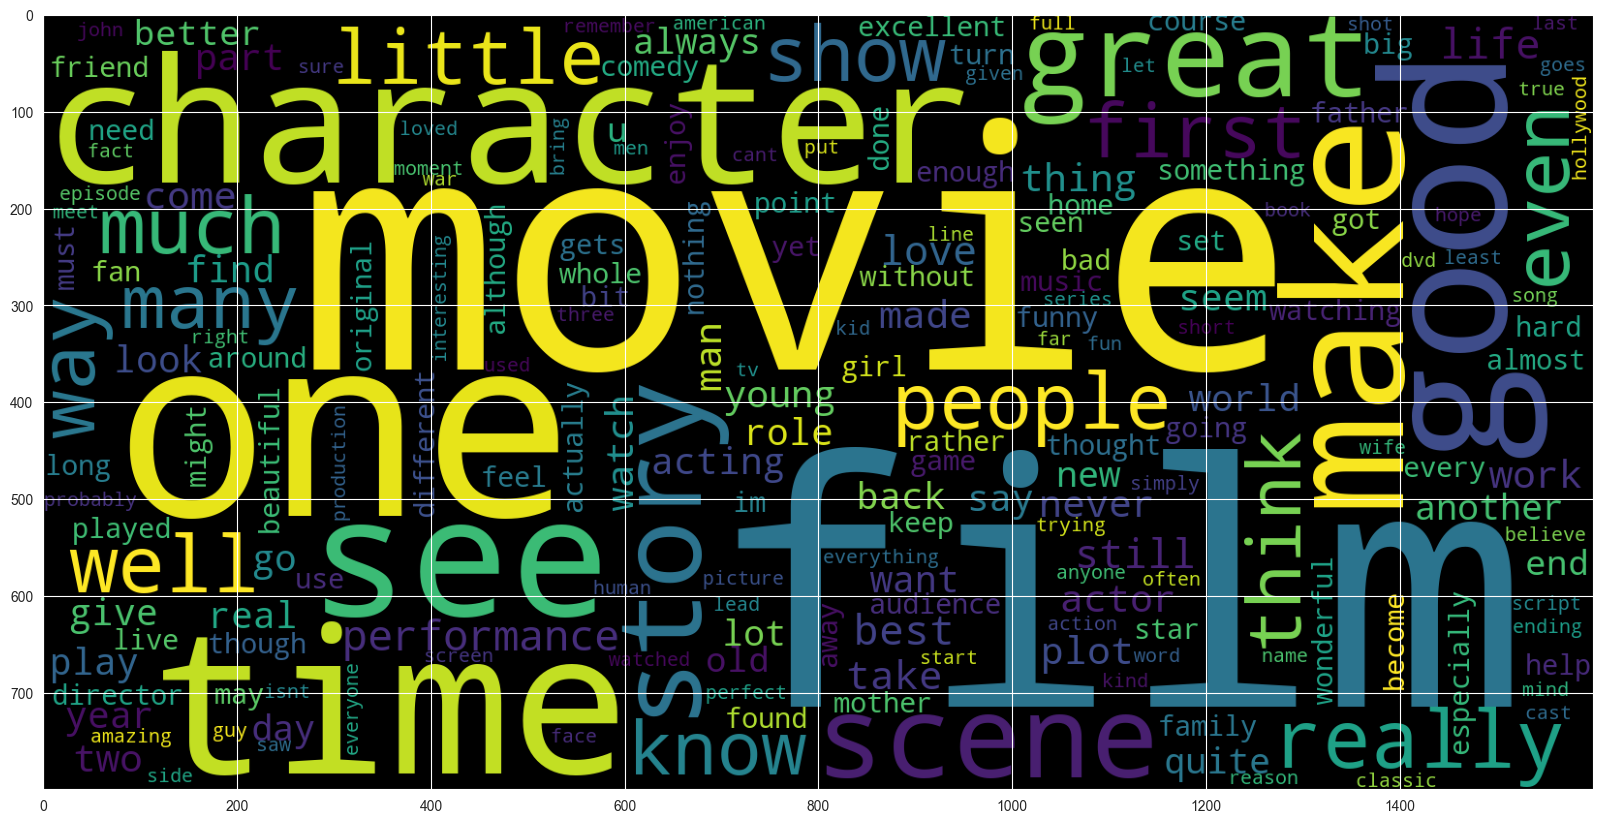

In [58]:
# Wordcloud
# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(width = 1600, height = 800).generate(" ".join(df[df['sentiment'] == 'positive']['review']))
plt.imshow(wc)

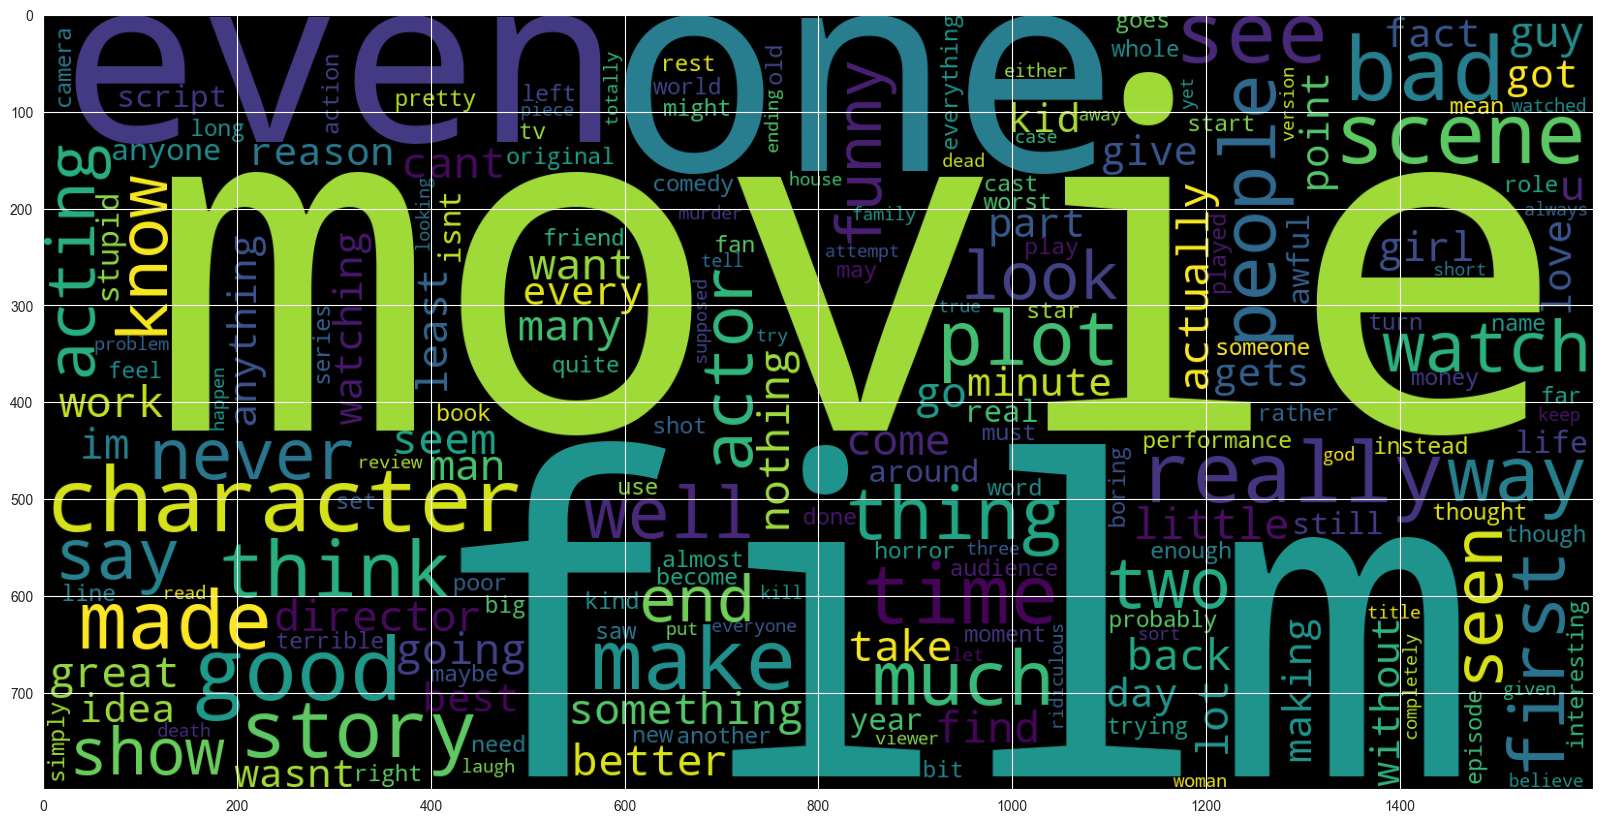

In [60]:
plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(width = 1600, height = 800).generate(" ".join(df[df['sentiment'] == 'negative']['review']))
plt.imshow(wc)

## 5. Vectorization
- we will perform the following steps to vectorize the text:
    - bag of words : it is a simple and commonly used method for text vectorization . it represents a text as a bag of its words , disregarding grammar and word order but keeping multiplicity .

In [65]:
df = temp

In [66]:
df

,review,sentiment,Tokenized_review,char_len,word_len
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",1146,166
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",656,84
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",592,87
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,...",440,64
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...",863,125
...,...,...,...,...,...
49995,thought movie right good job wasnt creative or...,positive,"[thought, movie, right, good, job, wasnt, crea...",533,82
49996,bad plot bad dialogue bad acting idiotic direc...,negative,"[bad, plot, bad, dialogue, bad, acting, idioti...",394,55
49997,catholic taught parochial elementary schools n...,negative,"[catholic, taught, parochial, elementary, scho...",819,114
49998,im going disagree previous comment side maltin...,negative,"[im, going, disagree, previous, comment, side,...",837,115
